In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv('C:\\project\\기계학습의 이해\\files\\건대입구역_최종데이터.csv',encoding='utf-8')

In [5]:
data.head(10)

,Transport_Date,Station_Name,Boarding_Alighting,Passenger_Count,Typhoon,Heatwave,Temperature,Precipitation,Relative_Humidity,Commute,...,일월날짜,승하차,cue,습도,적설,파업,IsHoliday,이전 승하차수,일주일 전 승하차 수,잠실 스포츠
0,2022.1.1,건대입구,승차,362,0,0,-10.1,0.0,0,1,...,1,1,0,53,0.0,0,1,362,362,0
1,2022.1.1,건대입구,하차,180,0,0,-10.1,0.0,0,1,...,1,0,0,53,0.0,0,1,362,180,0
2,2022.1.1,건대입구,승차,1606,0,0,-0.9,0.0,0,0,...,1,1,0,38,0.0,0,1,180,1606,0
3,2022.1.1,건대입구,하차,2758,0,0,-0.9,0.0,0,0,...,1,0,0,38,0.0,0,1,1606,2758,0
4,2022.1.2,건대입구,승차,346,0,0,-2.2,0.0,0,1,...,2,1,0,66,0.1,0,0,2758,346,0
5,2022.1.2,건대입구,하차,187,0,0,-2.2,0.0,0,1,...,2,0,0,66,0.1,0,0,346,187,0
6,2022.1.2,건대입구,하차,2878,0,0,-0.5,0.0,0,0,...,2,0,0,45,0.0,0,0,187,2878,0
7,2022.1.2,건대입구,승차,1689,0,0,-0.5,0.0,0,0,...,2,1,0,45,0.0,0,0,2878,362,0
8,2022.1.3,건대입구,하차,952,0,0,-7.7,0.0,0,1,...,3,0,0,55,0.0,0,0,1689,180,0
9,2022.1.3,건대입구,승차,1989,0,0,-7.7,0.0,0,1,...,3,1,0,55,0.0,0,0,952,1606,0


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# 데이터 불러오기
data=pd.read_csv('C:\\project\\기계학습의 이해\\files\\건대입구역_최종데이터.csv',encoding='utf-8')

# 데이터 전처리
data_numeric = data.drop(['Transport_Date', 'Station_Name', 'Boarding_Alighting'], axis=1)
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')
data_numeric = data_numeric.fillna(0)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_numeric)

# LSTM에 적합한 데이터 형태로 변환
def create_dataset(dataset, n_days):
    X, Y = [], []
    for i in range(len(dataset) - n_days - 1):
        a = dataset[i:(i + n_days), :]
        X.append(a)
        Y.append(dataset[i + n_days, 0])  # 'Passenger_Count'는 첫 번째 열로 가정
    return np.array(X), np.array(Y)

n_days = 5  # 과거 5일의 데이터 사용
X, Y = create_dataset(scaled_data, n_days)

# 데이터를 훈련 및 테스트 데이터로 분리
test_ratio = 0.2
n_test = int(len(X) * test_ratio)
X_train, X_test = X[:-n_test], X[-n_test:]
Y_train, Y_test = Y[:-n_test], Y[-n_test:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(5, 23)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

# 모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=60, batch_size=30)

# 테스트 데이터를 사용한 모델 평가
test_loss = model.evaluate(X_test, Y_test)
print('Test Loss:', test_loss)


Epoch 1/60
65/65 [==============================] - 2s 3ms/step - loss: 0.0774
Epoch 2/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 3/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4/60
65/65 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 5/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 6/60
65/65 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 7/60
65/65 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 8/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0315
Epoch 9/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 10/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 11/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0215
Epoch 12/60
65/65 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 13/60
65/65 [==============================

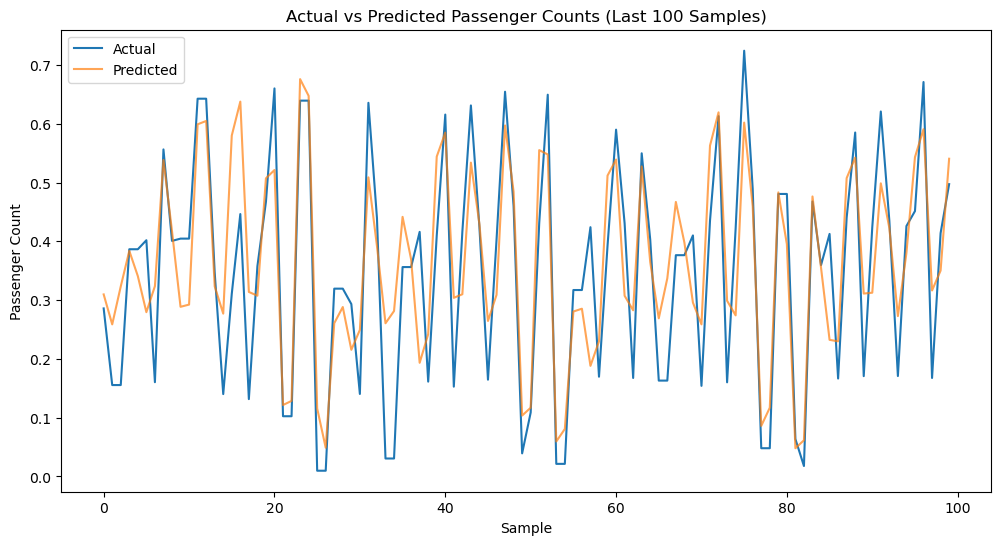

In [20]:
# 맨 뒤 100개의 테스트 데이터에 대한 예측 수행
Y_pred_subset = Y_pred[-100:]
Y_test_subset = Y_test[-100:]

# 실제 값과 예측 값을 시각화
plt.figure(figsize=(12, 6))
plt.plot(Y_test_subset, label='Actual')
plt.plot(Y_pred_subset, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Passenger Counts (Last 100 Samples)')
plt.xlabel('Sample')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


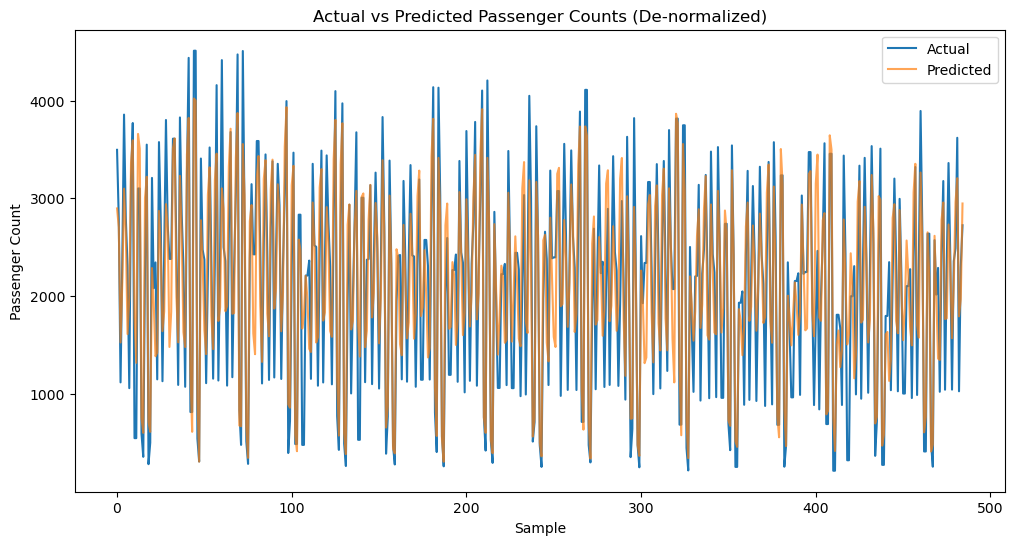

In [22]:
# 정규화된 예측 결과와 실제 값을 원래 스케일로 되돌리기 (역변환)
Y_test_inv = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1,1), np.zeros((Y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
Y_pred_inv = scaler.inverse_transform(np.concatenate((Y_pred, np.zeros((Y_pred.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# 역변환된 실제 값과 예측 값을 시각화
plt.figure(figsize=(12, 6))
plt.plot(Y_test_inv, label='Actual')
plt.plot(Y_pred_inv, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Passenger Counts (De-normalized)')
plt.xlabel('Sample')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


16/16 [==============================] - 0s 1ms/step


c:\Users\chohy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chohy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chohy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


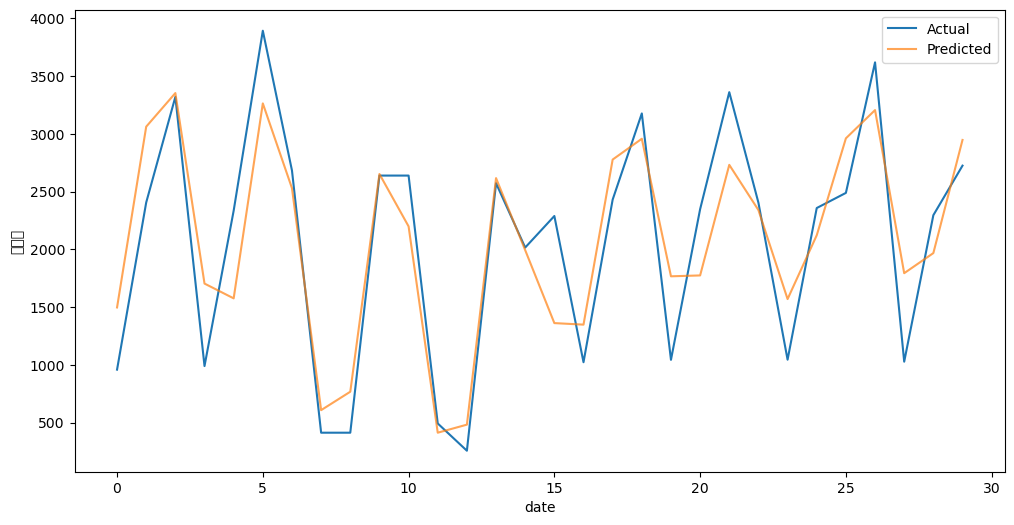

In [26]:
import matplotlib.pyplot as plt

# 모델을 사용하여 테스트 데이터에 대한 예측 수행
Y_pred = model.predict(X_test)

# 정규화된 예측 결과와 실제 값을 원래 스케일로 되돌리기 (역변환)
Y_test_inv = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1,1), np.zeros((Y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
Y_pred_inv = scaler.inverse_transform(np.concatenate((Y_pred, np.zeros((Y_pred.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# 마지막 100개 샘플 선택
Y_test_inv_subset = Y_test_inv[-30:]
Y_pred_inv_subset = Y_pred_inv[-30:]

# 역변환된 실제 값과 예측 값을 시각화
plt.figure(figsize=(12, 6))
plt.plot(Y_test_inv_subset, label='Actual')
plt.plot(Y_pred_inv_subset, label='Predicted', alpha=0.7)
plt.xlabel('date')
plt.ylabel('승하차')
plt.legend()
plt.show()
